In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [34]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
df = pd.read_csv(url)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [35]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'].values)
df['BP'] = encoder.fit_transform(df['BP'].values)
df['Cholesterol'] = encoder.fit_transform(df['Cholesterol'].values)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


In [36]:
X = df.drop('Drug', axis=1)
Y = df['Drug']

In [37]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=0.8, random_state=47)

In [39]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [40]:
y_predict = dt.predict(x_test)

In [41]:
print("DecisionTrees's Accuracy: ", accuracy_score(y_test, y_predict))

DecisionTrees's Accuracy:  0.95


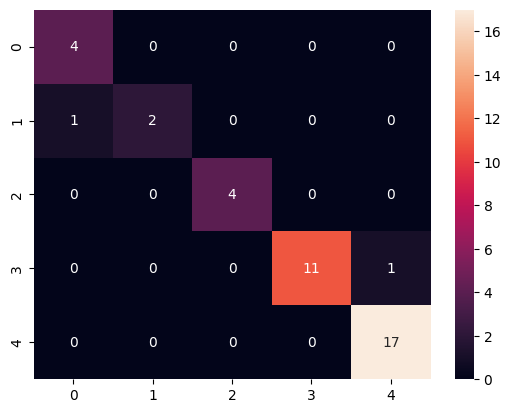

In [42]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [43]:
predict = cross_val_predict(estimator = dt, X = X, y = Y, cv = 5)
print("Classification Report: \n",classification_report(Y, predict))

Classification Report: 
               precision    recall  f1-score   support

       drugA       0.92      1.00      0.96        23
       drugB       1.00      0.88      0.93        16
       drugC       1.00      1.00      1.00        16
       drugX       1.00      0.98      0.99        54
       drugY       0.99      1.00      0.99        91

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200



In [44]:
print("Classification Report: \n",classification_report(y_test, y_predict))

Classification Report: 
               precision    recall  f1-score   support

       drugA       0.80      1.00      0.89         4
       drugB       1.00      0.67      0.80         3
       drugC       1.00      1.00      1.00         4
       drugX       1.00      0.92      0.96        12
       drugY       0.94      1.00      0.97        17

    accuracy                           0.95        40
   macro avg       0.95      0.92      0.92        40
weighted avg       0.96      0.95      0.95        40



In [46]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [47]:
rf_predict = rf.predict(x_test)

In [48]:
print("Accuracy: ", accuracy_score(y_test, rf_predict))

Accuracy:  0.975


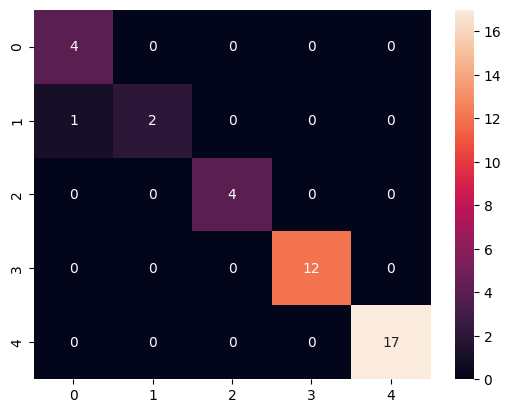

In [49]:
sns.heatmap(confusion_matrix(y_test, rf_predict), annot=True)
plt.show()

In [50]:
predict = cross_val_predict(estimator = rf, X = X, y = Y, cv = 5)
print("Classification Report: \n",classification_report(Y, predict))

Classification Report: 
               precision    recall  f1-score   support

       drugA       0.88      1.00      0.94        23
       drugB       1.00      0.81      0.90        16
       drugC       1.00      1.00      1.00        16
       drugX       1.00      0.98      0.99        54
       drugY       0.99      1.00      0.99        91

    accuracy                           0.98       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.98      0.98      0.98       200

